In [27]:
# importing libraries

import tensorflow as tf
import tensorflow.compat.v1 as tf1
import numpy as np
import pandas as pd
import cv2, pickle
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array
from os import listdir
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#Data collection and labelling

EPOCHS = 20
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/drive/MyDrive/Colab_Notebooks/Maize/Data/'
width = 256
height = 256
depth = 3


def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir:
        # remove .DS_Store from list
        if directory == ".DS_Store":
            root_dir.remove(directory)

    for plant_folder in root_dir:
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list:
            # remove .DS_Store from list
            if disease_folder == ".DS_Store":
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list:
                if single_plant_disease_image == ".DS_Store":
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")
image_size = len(image_list)
print(image_size)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer, open('/content/drive/MyDrive/Colab_Notebooks/label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")

X_train, Y_train, X_val, Y_val = train_test_split(np_image_list, image_labels, test_size=0.30, random_state=42)
print("Shape of feature matrix:", X_train.shape)
print("Shape of target matrix:", Y_train.shape)

[INFO] Loading images ...
[INFO] Processing army_worm ...
[INFO] Processing cutworm ...
[INFO] Image loading completed
40
['army_worm' 'cutworm']
[INFO] Spliting data to train, test
Shape of feature matrix: (28, 256, 256, 3)
Shape of target matrix: (12, 256, 256, 3)


In [ ]:
NUM_FEATURES = 65536
NUM_LABELS = 2
# initialize a tensorflow graph
graph = tf.Graph()

with graph.as_default():
    # Inputs
    tf_train_dataset = tf1.placeholder(tf.float32,
                                       shape=(BS, NUM_FEATURES))
    tf_train_labels = tf1.placeholder(tf.float32,
                                      shape=(BS, NUM_LABELS))
    tf_valid_dataset = tf1.placeholder(tf.float32,
                                       shape=(BS, NUM_FEATURES))

    # Variables.
    weights = tf.Variable(
        tf.random.truncated_normal([NUM_FEATURES, NUM_LABELS]))
    biases = tf.Variable(tf.zeros([NUM_LABELS]))

    # Training computation.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        labels=tf_train_labels, logits=logits))

    # Optimizer.
    optimizer = tf1.train.GradientDescentOptimizer(
        INIT_LR).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    tf_valid_dataset = tf.cast(tf_valid_dataset, tf.float32)
    valid_prediction = tf.nn.softmax(
        tf.matmul(tf_valid_dataset, weights) + biases)

In [ ]:

# utility function to calculate accuracy
def accuracy(predictions, labels):
    correctly_predicted = np.sum(
        np.argmax(predictions, 1) == np.argmax(labels, 1))
    acc = (100.0 * correctly_predicted) / predictions.shape[0]
    return acc

In [ ]:
NUM_STEPS = 5001
train_dataset = X_train.reshape(-1, 65536)
train_labels = 2
valid_labels = 2

with tf1.Session(graph=graph) as session:
    # initialize weights and biases
    tf1.global_variables_initializer().run()
    print("Initialized")

    for step in range(NUM_STEPS):
        # pick a randomized offset
        offset = np.random.randint(0, train_labels)

        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + BS), :]
        batch_labels = train_labels[offset:(offset + BS)]

        # Prepare the feed dict
        feed_dict = {tf_train_dataset: batch_data,
                     tf_train_labels: batch_labels}

        # run one step of computation
        _, l, predictions = session.run([optimizer, loss, train_prediction],
                                        feed_dict=feed_dict)

        if (step % 500 == 0):
            print("Minibatch loss at step {0}: {1}".format(step, l))
            print("Minibatch accuracy: {:.1f}%".format(
                accuracy(predictions, batch_labels)))
            print("Validation accuracy: {:.1f}%".format(
                accuracy(valid_prediction.eval(), valid_labels)))

Initialized


TypeError: ignored

In [2]:
#Data collection and labelling

EPOCHS = 20
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/drive/MyDrive/Colab_Notebooks/Maize/Data/'
width = 256
height = 256
depth = 3


def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir:
        # remove .DS_Store from list
        if directory == ".DS_Store":
            root_dir.remove(directory)

    for plant_folder in root_dir:
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list:
            # remove .DS_Store from list
            if disease_folder == ".DS_Store":
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list:
                if single_plant_disease_image == ".DS_Store":
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")
image_size = len(image_list)
print(image_size)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer, open('/content/drive/MyDrive/Colab_Notebooks/label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")

X_train, _, X_val, _ = train_test_split(np_image_list, image_labels, test_size=0.30, random_state=42)
# X_train, X_val = standard_scale(X_train, X_val)

[INFO] Loading images ...
[INFO] Processing army_worm ...
[INFO] Processing cutworm ...
[INFO] Image loading completed
40
['army_worm' 'cutworm']
[INFO] Spliting data to train, test


In [3]:
train_data = tf.data.Dataset.from_tensor_slices(
        X_train).batch(256).shuffle(buffer_size = 1024)
test_data = tf.data.Dataset.from_tensor_slices(
        X_val).batch(256).shuffle(buffer_size = 512)

n_samples = int(len(X_train) + len(X_val))
training_epochs = 20
batch_size = 256
display_step = 1

optimizer = tf.optimizers.Adam(learning_rate = 0.01)
mse_loss = tf.keras.losses.MeanSquaredError()
loss_metric = tf.keras.metrics.Mean()

In [21]:
#Relu on Auto-encoder
class Encoder(tf.keras.layers.Layer):
    '''Encodes a digit from the MNIST dataset'''

    def __init__(self,
                n_dims,
                name ='encoder',
                **kwargs):
        super(Encoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.n_layers = 1
        self.encode_layer = layers.Dense(n_dims, activation ='relu')

    @tf.function
    def call(self, inputs):
        return self.encode_layer(inputs)

class Decoder(tf.keras.layers.Layer):
    '''Decodes a digit from the MNIST dataset'''

    def __init__(self,
                n_dims,
                name ='decoder',
                **kwargs):
        super(Decoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.n_layers = len(n_dims)
        self.decode_middle = layers.Dense(n_dims[0], activation ='relu')
        self.recon_layer = layers.Dense(n_dims[1], activation ='sigmoid')

    @tf.function
    def call(self, inputs):
        x = self.decode_middle(inputs)
        return self.recon_layer(x)

class Autoencoder(tf.keras.Model):
    '''Vanilla Autoencoder for MNIST digits'''

    def __init__(self,
                 n_dims =[256, 256, 3],
                 name ='autoencoder',
                 **kwargs):
        super(Autoencoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.encoder = Encoder(n_dims[0])
        self.decoder = Decoder([n_dims[1], n_dims[2]])

    @tf.function
    def call(self, inputs):
        x = self.encoder(inputs)
        return self.decoder(x)

print(Decoder([256, 256, 3]))
print(Autoencoder([256, 256, 3]))

In [ ]:
#fitting with Relu
ae = Autoencoder([256, 256, 3])
ae.compile(optimizer = tf.optimizers.Adam(0.01),
           loss ='categorical_crossentropy')
ae.fit(X_train, X_train, batch_size = 64, epochs = 5)

Epoch 1/5
1/1 [==============================] - 16s 16s/step - loss: 2.0373
Epoch 2/5
1/1 [==============================] - 14s 14s/step - loss: 2.1081
Epoch 3/5
1/1 [==============================] - 15s 15s/step - loss: 2.0349
Epoch 4/5
1/1 [==============================] - 18s 18s/step - loss: 2.0331
Epoch 5/5
1/1 [==============================] - 15s 15s/step - loss: 2.0331


In [28]:
#Leaky-relu on Auto-encoder
class Encoder(tf.keras.layers.Layer):
    '''Encodes a digit from the MNIST dataset'''

    def __init__(self,
                n_dims,
                name ='encoder',
                **kwargs):
        super(Encoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.n_layers = 1
        self.encode_layer = layers.Dense(n_dims, activation =LeakyReLU(alpha=0.01))

    @tf.function
    def call(self, inputs):
        return self.encode_layer(inputs)

class Decoder(tf.keras.layers.Layer):
    '''Decodes a digit from the MNIST dataset'''

    def __init__(self,
                n_dims,
                name ='decoder',
                **kwargs):
        super(Decoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.n_layers = len(n_dims)
        self.decode_middle = layers.Dense(n_dims[0], activation = LeakyReLU(alpha=0.01))
        self.recon_layer = layers.Dense(n_dims[1], activation ='sigmoid')

    @tf.function
    def call(self, inputs):
        x = self.decode_middle(inputs)
        return self.recon_layer(x)

class Autoencoder(tf.keras.Model):
    '''Vanilla Autoencoder for MNIST digits'''

    def __init__(self,
                 n_dims =[256, 256, 3],
                 name ='autoencoder',
                 **kwargs):
        super(Autoencoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.encoder = Encoder(n_dims[0])
        self.decoder = Decoder([n_dims[1], n_dims[2]])

    @tf.function
    def call(self, inputs):
        x = self.encoder(inputs)
        return self.decoder(x)

print(Decoder([256, 256, 3]))
print(Autoencoder([256, 256, 3]))

In [29]:
#fitting with Leaky-relu
ae = Autoencoder([256, 256, 3])
ae.compile(optimizer = tf.optimizers.Adam(0.01),
           loss ='categorical_crossentropy')
ae.fit(X_train, X_train, batch_size = 64, epochs = 5)

Epoch 1/5
1/1 [==============================] - 26s 26s/step - loss: 2.0370
Epoch 2/5
1/1 [==============================] - 30s 30s/step - loss: 2.1702
Epoch 3/5
1/1 [==============================] - 33s 33s/step - loss: 2.0347
Epoch 4/5
1/1 [==============================] - 33s 33s/step - loss: 2.0379
Epoch 5/5
1/1 [==============================] - 32s 32s/step - loss: 2.0394


In [32]:
#Cosine on Auto-encoder
class Encoder(tf.keras.layers.Layer):
    '''Encodes a digit from the MNIST dataset'''

    def __init__(self,
                n_dims,
                name ='encoder',
                **kwargs):
        super(Encoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.n_layers = 1
        self.encode_layer = layers.Dense(n_dims, activation =tf.cos)

    @tf.function
    def call(self, inputs):
        return self.encode_layer(inputs)

class Decoder(tf.keras.layers.Layer):
    '''Decodes a digit from the MNIST dataset'''

    def __init__(self,
                n_dims,
                name ='decoder',
                **kwargs):
        super(Decoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.n_layers = len(n_dims)
        self.decode_middle = layers.Dense(n_dims[0], activation =tf.cos)
        self.recon_layer = layers.Dense(n_dims[1], activation ='sigmoid')

    @tf.function
    def call(self, inputs):
        x = self.decode_middle(inputs)
        return self.recon_layer(x)

class Autoencoder(tf.keras.Model):
    '''Vanilla Autoencoder for MNIST digits'''

    def __init__(self,
                 n_dims =[256, 256, 3],
                 name ='autoencoder',
                 **kwargs):
        super(Autoencoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.encoder = Encoder(n_dims[0])
        self.decoder = Decoder([n_dims[1], n_dims[2]])

    @tf.function
    def call(self, inputs):
        x = self.encoder(inputs)
        return self.decoder(x)

print(Decoder([256, 256, 3]))
print(Autoencoder([256, 256, 3]))

In [33]:
#fitting with Cosine
ae = Autoencoder([256, 256, 3])
ae.compile(optimizer = tf.optimizers.Adam(0.01),
           loss ='categorical_crossentropy')
ae.fit(X_train, X_train, batch_size = 64, epochs = 5)

Epoch 1/5
1/1 [==============================] - 32s 32s/step - loss: 2.1452
Epoch 2/5
1/1 [==============================] - 27s 27s/step - loss: 2.0900
Epoch 3/5
1/1 [==============================] - 24s 24s/step - loss: 5.1941
Epoch 4/5
1/1 [==============================] - 28s 28s/step - loss: 2.1011
Epoch 5/5
1/1 [==============================] - 24s 24s/step - loss: 2.0420


In [35]:
#tanh on Auto-encoder
class Encoder(tf.keras.layers.Layer):
    '''Encodes a digit from the MNIST dataset'''

    def __init__(self,
                n_dims,
                name ='encoder',
                **kwargs):
        super(Encoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.n_layers = 1
        self.encode_layer = layers.Dense(n_dims, activation =tf.tanh)

    @tf.function
    def call(self, inputs):
        return self.encode_layer(inputs)

class Decoder(tf.keras.layers.Layer):
    '''Decodes a digit from the MNIST dataset'''

    def __init__(self,
                n_dims,
                name ='decoder',
                **kwargs):
        super(Decoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.n_layers = len(n_dims)
        self.decode_middle = layers.Dense(n_dims[0], activation =tf.tanh)
        self.recon_layer = layers.Dense(n_dims[1], activation ='sigmoid')

    @tf.function
    def call(self, inputs):
        x = self.decode_middle(inputs)
        return self.recon_layer(x)

class Autoencoder(tf.keras.Model):
    '''Vanilla Autoencoder for MNIST digits'''

    def __init__(self,
                 n_dims =[256, 256, 3],
                 name ='autoencoder',
                 **kwargs):
        super(Autoencoder, self).__init__(name = name, **kwargs)
        self.n_dims = n_dims
        self.encoder = Encoder(n_dims[0])
        self.decoder = Decoder([n_dims[1], n_dims[2]])

    @tf.function
    def call(self, inputs):
        x = self.encoder(inputs)
        return self.decoder(x)

print(Decoder([256, 256, 3]))
print(Autoencoder([256, 256, 3]))

In [36]:
#fitting with tanh
ae = Autoencoder([256, 256, 3])
ae.compile(optimizer = tf.optimizers.Adam(0.01),
           loss ='categorical_crossentropy')
ae.fit(X_train, X_train, batch_size = 64, epochs = 5)

Epoch 1/5
1/1 [==============================] - 29s 29s/step - loss: 2.0367
Epoch 2/5
1/1 [==============================] - 26s 26s/step - loss: 2.5759
Epoch 3/5
1/1 [==============================] - 20s 20s/step - loss: 2.0763
Epoch 4/5
1/1 [==============================] - 26s 26s/step - loss: 2.0169
Epoch 5/5
1/1 [==============================] - 19s 19s/step - loss: 2.0243


1/1 [==============================] - 0s 176ms/step
probability:0.7068664


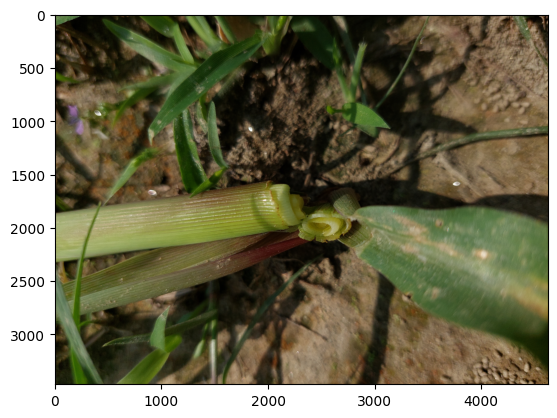

In [ ]:
image_dir = "/content/drive/MyDrive/Colab_Notebooks/Maize/Data/validation/cutworm/cutworm (16).jpg"
img = plt.imread('/content/drive/MyDrive/Colab_Notebooks/Maize/Data/validation/cutworm/cutworm (16).jpg')
im = convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)
result = ae.predict(npp_image)
print("probability:" + str(np.max(result)))
plt.imshow(img)
plt.show()